In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [19]:
image_path = r"C:\Users\Student\Desktop\butterfly-on-flower-pictures-599-x-900-1ixwvf93pmnklx3o.jpg"

In [20]:
import matplotlib.pyplot as plt

def plotimage(img, title=None, figsize=None):
    h, w = img.shape[:2]  # Extract height and width of the image
    dpi = 80
    
    if figsize is None:
        figsize = (w / dpi, h / dpi)  # Calculate figure size based on image dimensions
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])  # Add axes spanning the entire figure
    ax.axis('off')  # Turn off axis
    
    if len(img.shape) == 2:  # Grayscale image
        ax.imshow(img, cmap='gray')
    else:  # Color image (assuming RGB)
        ax.imshow(img)
    
    if title:
        plt.title(title)  # Set title if provided
    
    plt.show()  # Display the plot


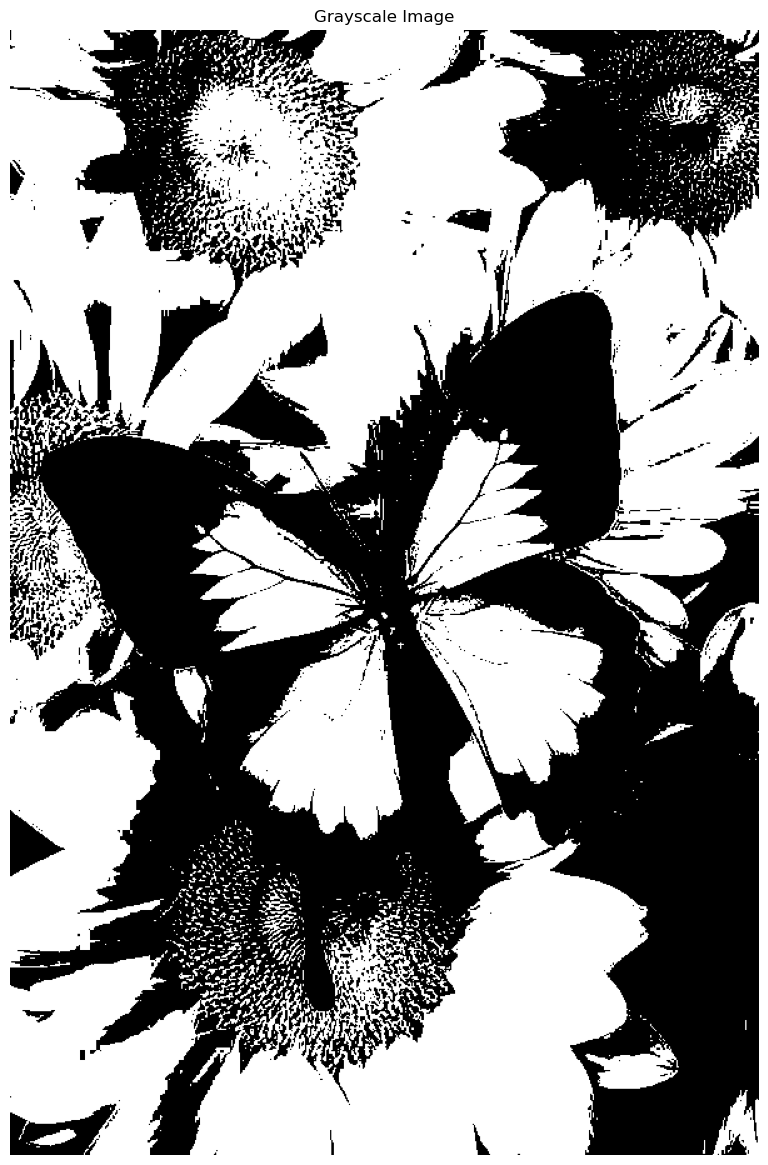

In [21]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold = 100
gray[gray<threshold] = 0
gray[gray>=threshold] = 1
bw = gray
plotimage(bw, 'Grayscale Image')

100.0%


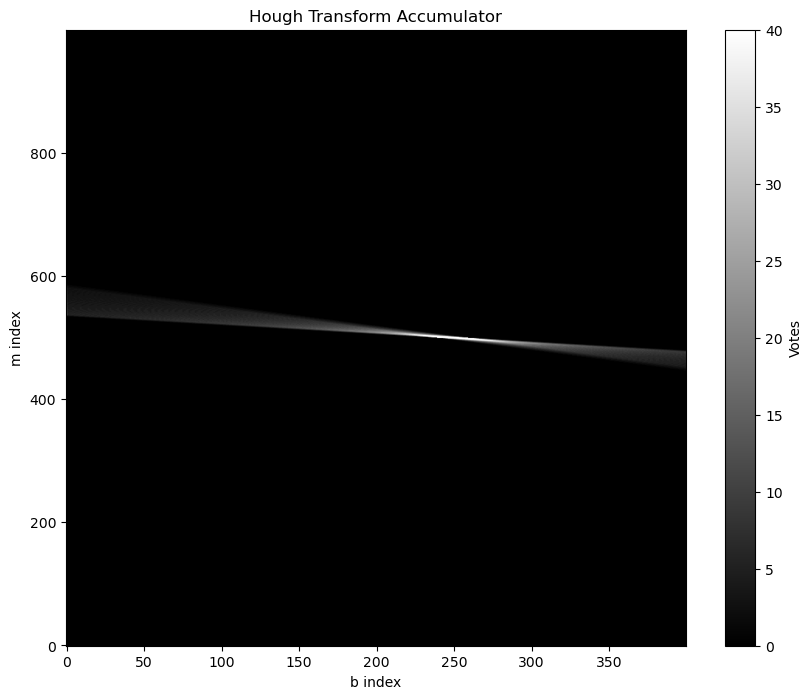

In [22]:
import numpy as np
import cv2
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Assuming bw is your binary image
bw = np.zeros((100, 100))
bw[30:70, 40:60] = 1  # Example: creating a simple binary image with a rectangle

# Define parameters for Hough Transform
min_m = -50
max_m = -min_m
step_m = 0.1
max_b = 2 * max(bw.shape)
min_b = -max_b
step_b = 1

# Create arrays for m and b values
m_vals = np.arange(min_m, max_m, step_m)
b_vals = np.arange(min_b, max_b, step_b)

def draw_line(x, y):
    '''
    Returns a new image where the line b = -x*m + y is drawn on it
    '''
    res_im = np.zeros((len(m_vals), len(b_vals)), dtype='int')
    b_vals_adjusted = np.arange(min_b, max_b, step_b)
    for idx, m in enumerate(m_vals):
        b = -x * m + y
        b_idx = int((b - min_b) / step_b)
        if b_idx >= 0 and b_idx < len(b_vals_adjusted):
            res_im[idx, b_idx] = 1
    return res_im

# Initialize votes matrix
votes = np.zeros((len(m_vals), len(b_vals)), dtype='int')

# Perform Hough Transform
prev_percentage = None
for x in range(bw.shape[0]):
    for y in range(bw.shape[1]):
        if bw[x, y]:
            mask = draw_line(x, y)
            votes += mask
            
    # Display progress
    percentage = (x + 1) / bw.shape[0]
    if percentage != prev_percentage:
        clear_output(wait=True)
        print("{:.1%}".format(percentage))
        prev_percentage = percentage

# Plot the accumulated votes
plt.figure(figsize=(10, 8))
plt.imshow(votes, cmap='gray', origin='lower', aspect='auto')
plt.title('Hough Transform Accumulator')
plt.xlabel('b index')
plt.ylabel('m index')
plt.colorbar(label='Votes')
plt.show()


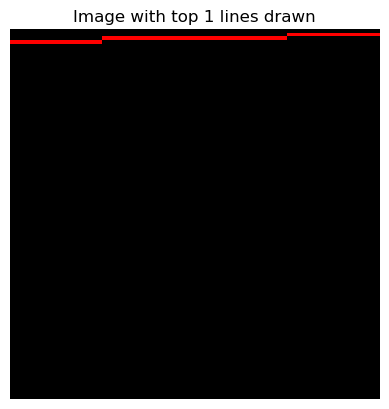

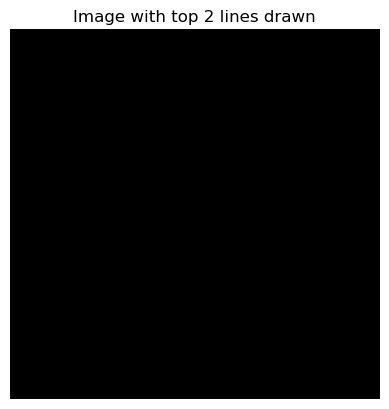

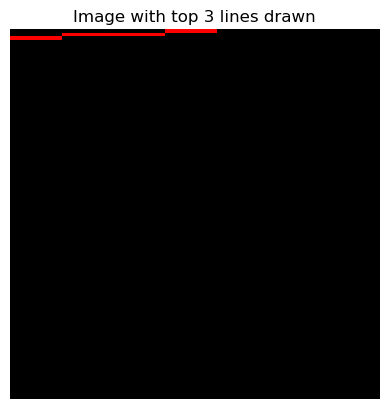

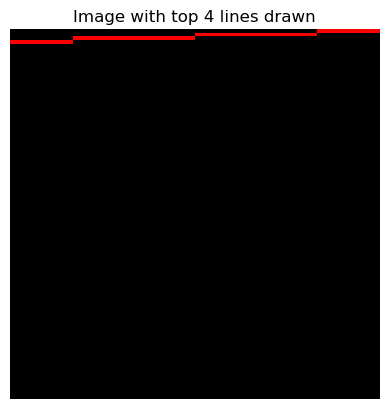

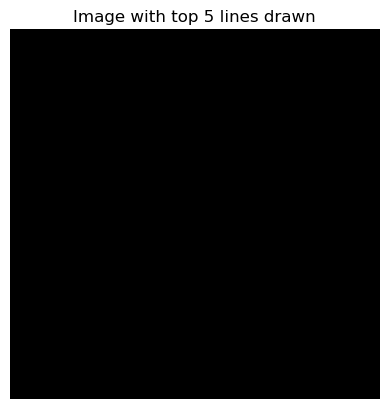

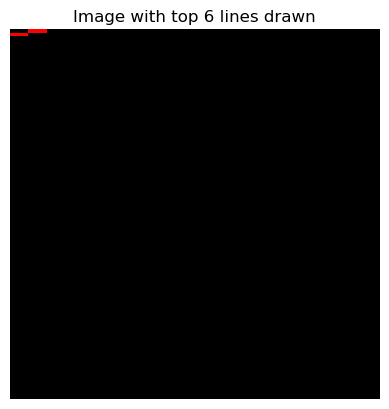

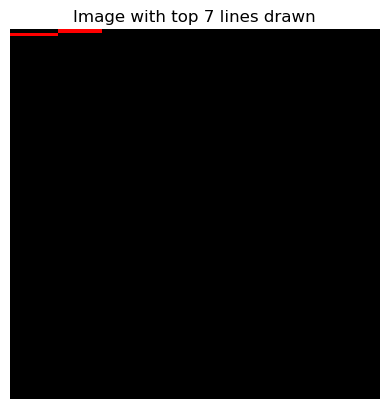

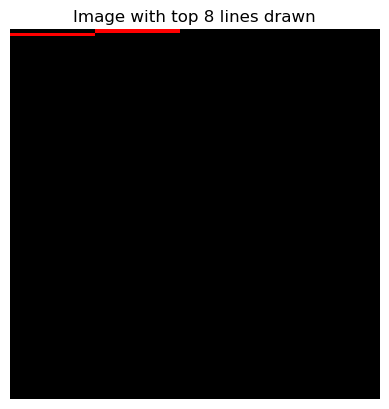

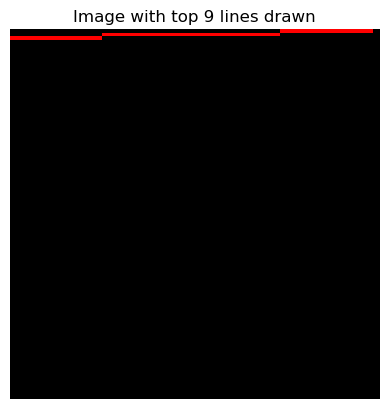

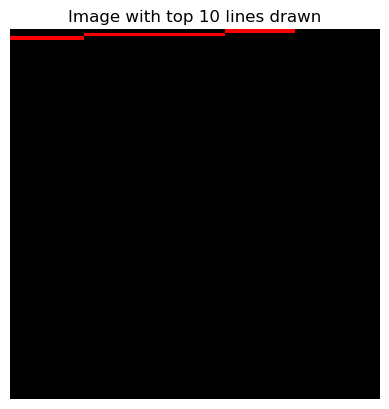

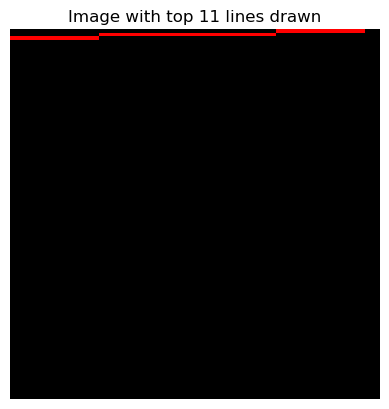

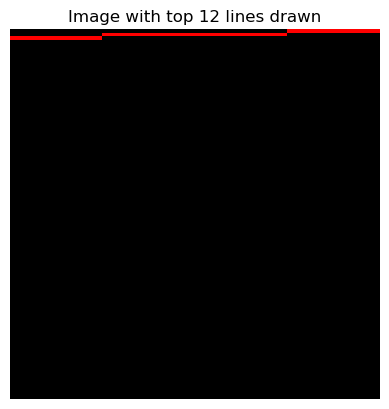

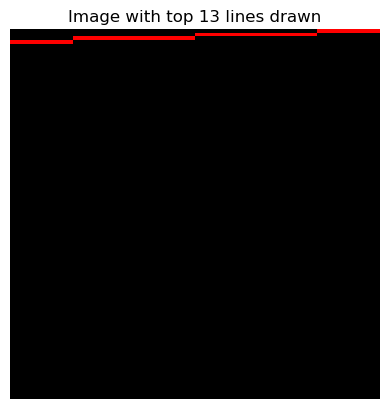

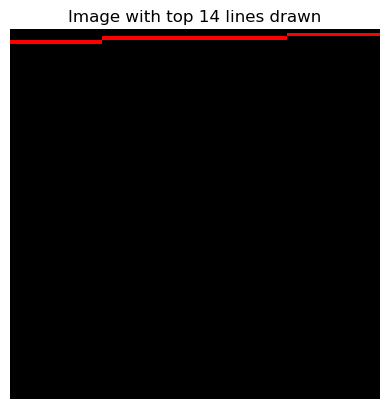

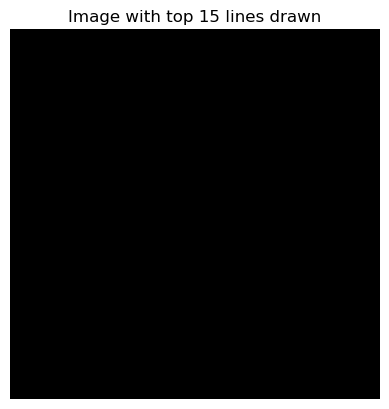

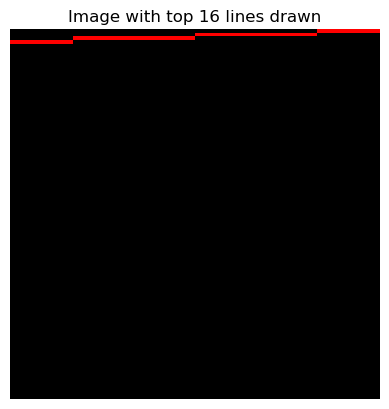

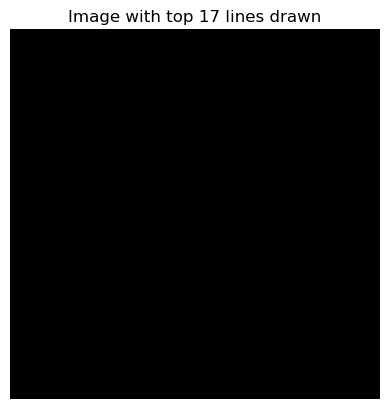

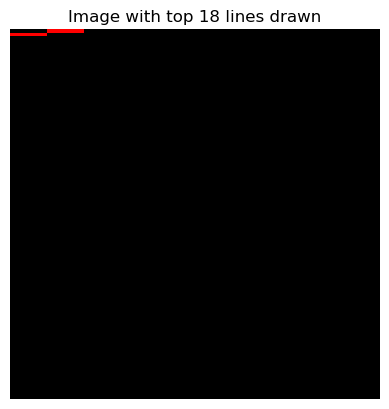

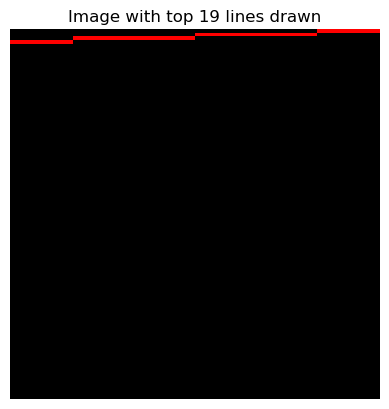

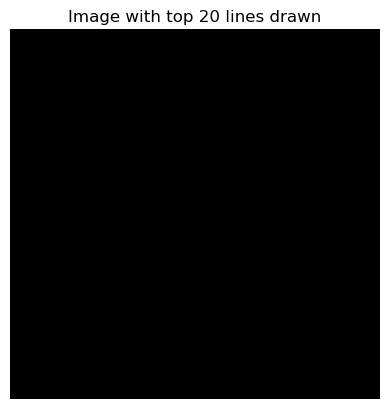

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Example parameters and votes
min_m = -50
max_m = 50
step_m = 0.1
max_b = 200
min_b = -200
step_b = 1

# Create votes array (dummy example)
votes = np.random.randint(0, 100, size=(int((max_m - min_m) / step_m), int((max_b - min_b) / step_b)))

def draw_max(image, votes, step_m, min_m, step_b, min_b, color=(255, 0, 0), skip=False):
    m0, b0 = np.unravel_index(votes.argmax(), votes.shape)
    votes[m0, b0] = 0  # Mark the maximum vote as used

    if skip:
        return

    b = b0 * step_b + min_b
    m = m0 * step_m + min_m

    x0 = 0
    x1 = image.shape[1]  # Use image.shape[1] to get the width of the image
    y0 = int(b)  # Calculate y0 based on intercept b
    y1 = int(m * x1 + b)  # Calculate y1 based on slope m and intercept b

    cv2.line(image, (y0, x0), (y1, x1), color, 1)

# Example binary image (all zeros for this example)
bw = np.zeros((100, 100), dtype=np.uint8)

# Example usage to draw multiple lines
N = 20
for i in range(N):
    colored = cv2.cvtColor(bw * 255, cv2.COLOR_GRAY2BGR)  # Convert bw to BGR for drawing color lines
    draw_max(colored, votes, step_m, min_m, step_b, min_b, (255, 0, 0), False)

    # Plotting
    plt.figure()
    plt.imshow(colored)
    plt.title(f"Image with top {i+1} lines drawn")
    plt.axis('off')
    plt.show()





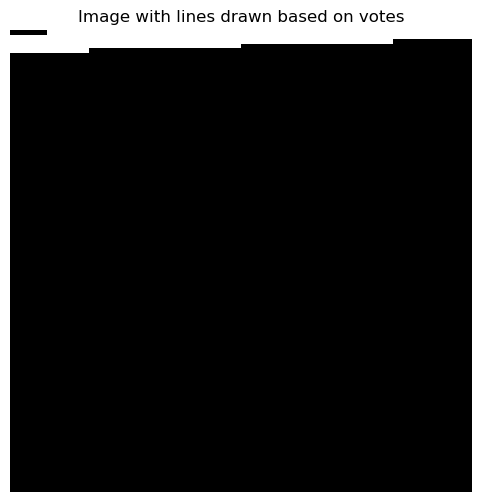

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Example parameters and votes
min_m = -50
max_m = 50
step_m = 0.1
max_b = 200
min_b = -200
step_b = 1

# Create votes array (dummy example)
votes = np.random.randint(0, 100, size=(int((max_m - min_m) / step_m), int((max_b - min_b) / step_b)))

def draw_max(image, votes, color=(255, 0, 0), skip=False):
    m0, b0 = np.unravel_index(votes.argmax(), votes.shape)
    votes[m0, b0] = 0  # Mark the maximum vote as used

    if skip:
        return

    b = b0 * step_b + min_b
    m = m0 * step_m + min_m

    x0 = 0
    x1 = image.shape[0]  # Use image.shape[0] to get the height of the image
    y0 = int(b)  # Calculate y0 based on intercept b
    y1 = int(m * x1 + b)  # Calculate y1 based on slope m and intercept b

    cv2.line(image, (y0, x0), (y1, x1), color, 1)

# Example binary image (all zeros for this example)
bw = np.zeros((100, 100), dtype=np.uint8)

# Example usage to draw multiple lines
im = bw.copy()
N = 50
for i in range(N):
    draw_max(im, votes, (255, 0, 0), False)

# Plotting the final result
plt.figure(figsize=(8, 6))
plt.imshow(im, cmap='gray')  # Use cmap='gray' if the image is binary
plt.title("Image with lines drawn based on votes")
plt.axis('off')
plt.show()



In [29]:
im = img.copy()
lines = cv2.HoughLines(bw, 1, np.pi/360, 0)
for i in range(50):
 for rho,theta in lines[i]:
 a = np.cos(theta)
 b = np.sin(theta)
 x0 = a*rho
 y0 = b*rho
 x1 = int(x0 + 1000*(-b))
 y1 = int(y0 + 1000*(a))
 x2 = int(x0 - 1000*(-b))
 y2 = int(y0 - 1000*(a))
 cv2.line(im,(x1,y1),(x2,y2),(0,0,255),1)
plt.imshow(im)
print(lines[0].shape)
(1, 2)

IndentationError: expected an indented block after 'for' statement on line 4 (4096089340.py, line 5)